In [16]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
import pandas as pd
import re
import matplotlib as mpl
mpl.rc('font', family='nanumgothic')
mpl.rc('axes', unicode_minus=False)

In [17]:
df = pd.read_csv('tuned_dataframe.csv')
df.shape

/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(37247, 16)

In [18]:
df['year_infor'] = [str(i).split('.') [0]for i in df['year_infor'].values]
df['year_refer'] = [str(i).split('.') [0]for i in df['year_refer'].values]

In [19]:
df.dtypes

paper_name_infor     object
institution_infor    object
author_infor         object
journal_infor        object
dont_know_infor      object
page_infor           object
year_infor           object
field_infor          object
cited_infor          object
char_refer           object
degree_refer         object
journal_refer        object
name_refer           object
paper_refer          object
school_refer         object
year_refer           object
dtype: object

In [20]:
df.isnull().sum()

paper_name_infor         0
institution_infor        0
author_infor             0
journal_infor            0
dont_know_infor          0
page_infor               0
year_infor               0
field_infor              0
cited_infor              0
char_refer             242
degree_refer         37153
journal_refer         8407
name_refer            4485
paper_refer            242
school_refer         37153
year_refer               0
dtype: int64

In [5]:
set(df['journal_refer'].values)

{nan,
 'Journal ofAccounting and Economics 31 : 321 ~ 387,',
 'Asia-Pacific Journal of Financial Studies 34 (2) : 153 ~ 180,',
 'Proceedings of the 37th Annual Hawaii International Conference,',
 'Journal of Banking & Finance 28 (3) : 595 ~ 614,',
 '한국증권학회지 42 (4) : 759 ~ 788,',
 'International Review of Financial Analysis 10 (1) : 87 ~ 96,',
 'The Journal of Finance 56 : 1929 ~ 1957,',
 'European Financial Management 15 : 402 ~ 429,',
 'European Financial Management 22 (2) : 171 ~ 192,',
 '산업경제연구 27 (6) : 2709 ~ 2735,',
 'of Financial Economics 43 : 29 ~ 77,',
 'Journal of Financial Economics 86 (2) : 446 ~ 478,',
 'Journal of Financial Economics 25 : 241 ~ 262,',
 'IRWIN professional Publishing: IL,',
 '재무관리논총 6 (1) : 23 ~ 45,',
 'Journal of Econometrics 182 : 135 ~ 144,',
 '증권학회지 11 (1) : 15 ~ 59,',
 '재무관리연구 11 (2) : 131 ~ 159,',
 'Journal of Finance 32 : 349 ~ 365,',
 'The Accounting Review 79 : 967 ~ 1010,',
 'Journal of Money, Credit, and Banking 29 (3) : 300 ~ 313,',
 '재무관리연구 16

In [6]:
%%time
process_ls = []
for idx,val in enumerate(df['journal_refer'].values) : 
    if df['journal_refer'].notnull()[idx] :
        process_ls.append(','.join(re.findall('\D',val)).replace(",",'').split(' : ')[0])
    else : process_ls.append(val)

CPU times: user 41 s, sys: 23.6 ms, total: 41 s
Wall time: 40.8 s


In [7]:
for idx,val in enumerate(process_ls) : 
    try : 
        process_ls[idx] = val.replace('(','').replace(')','')
    except : pass
process_ls = [i for i in process_ls if i != '']

In [8]:
for idx,val in enumerate(process_ls) : 
    if type(val) != float : 
        if val[-1] == ' ' :
            process_ls[idx] = val[:-1]
    else : pass            

In [9]:
journal_dict = Counter(process_ls)
journal_dict

Counter({nan: 8407,
         'Asia-Pacific Journal of Financial Studies ': 706,
         'Asia-Pacific Journal of Financial Studies': 86,
         '회계정보연구': 7,
         '회계학연구 ': 134,
         'Journal of Financial Economics': 2254,
         'Journal of Finance': 2914,
         'Pacific-Basin Finance Journal': 62,
         'Journal of Financial and Quantitative Analysis': 379,
         'Journal of Financial Research': 80,
         'Accounting and Business Research': 3,
         'China Economic Review': 1,
         'Journal of Banking and Finance': 364,
         'Econometrica': 372,
         'Review of Financial Studies': 830,
         'Review of Quantitative Finance and Accounting': 19,
         'Biometrika': 22,
         'Journal of Econometrics': 199,
         'American Economic Review': 315,
         'Quarterly Journal of Economics': 159,
         'Oxford University Press': 41,
         'Princeton University Press': 35,
         'MIT Press': 18,
         'Journal of Economic Dynamic

In [10]:
testing_df = pd.DataFrame(index=list(journal_dict.keys()))
testing_df['count'] = list(journal_dict.values())

In [12]:
journal_name_ls = list(testing_df.iloc[1:].index)

In [11]:
testing_df.sort_values(by='count',ascending=False).iloc[1:].head(10)

,count
Journal of Finance,2914
Journal of Financial Economics,2254
Journal of Finance,1075
재무관리연구,926
재무연구,846
Review of Financial Studies,830
Asia-Pacific Journal of Financial Studies,706
Journal of Financial Economics,702
한국증권학회지,618
선물연구,595


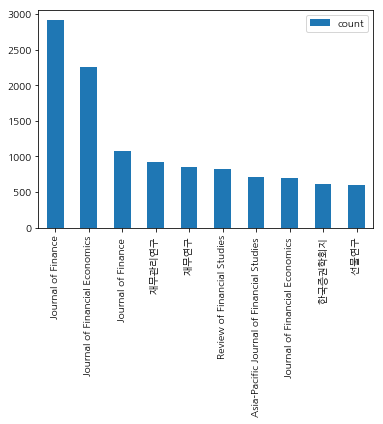

In [12]:
testing_df.sort_values(by='count',ascending=False).iloc[1:].head(10).plot.bar()